BYRON OTIENO OUMA - IN13/00062/20
BRYAN OKOTH       - IN13/00062/21


In [1]:
from google.colab import files
uploaded = files.upload()


Saving stock_prices.txt to stock_prices.txt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("stock_prices.txt")  # Replace with your filename
print(df.head())  # Display first few rows
print(df.info())  # Check data types
print(df.describe())  # Summary statistics


         Date   Open   High    Low  Close   Volume
0  2024-01-01  150.0  152.5  149.0  151.0  1000000
1  2024-01-02  151.5  153.0  150.5  152.5  1200000
2  2024-01-03  152.0  155.0  151.0  154.0  1300000
3  2024-01-04  154.5  156.0  153.5  155.5  1100000
4  2024-01-05  155.0  157.5  154.0  156.0  1250000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8 non-null      object 
 1   Open    8 non-null      float64
 2   High    8 non-null      float64
 3   Low     8 non-null      float64
 4   Close   8 non-null      float64
 5   Volume  8 non-null      int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 516.0+ bytes
None
             Open        High         Low       Close        Volume
count    8.000000    8.000000    8.000000    8.000000  8.000000e+00
mean   154.312500  156.437500  153.312500  155.437500  1.262500e+06
std      2.877716    2

In [4]:
# Check column names
print(df.columns)

# Assuming the stock price is in a column named 'Close' (modify if needed)
stock_prices = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices_scaled = scaler.fit_transform(stock_prices)

# Split data into training (80%) and testing (20%)
train_size = int(len(stock_prices_scaled) * 0.8)
train_data, test_data = stock_prices_scaled[:train_size], stock_prices_scaled[train_size:]


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [5]:
import numpy as np

# Sample train and test data (replace with real stock prices)
train_data = np.array([i for i in range(50)])  # Example dataset
test_data = np.array([i for i in range(50, 100)])

def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Check sequence length validity
seq_length = 30
if len(train_data) <= seq_length or len(test_data) <= seq_length:
    raise ValueError("Sequence length is too large for the dataset!")

# Create sequences
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Print shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Final X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)


X_train shape: (20, 30)
y_train shape: (20,)
Final X_train shape: (20, 30, 1)
Final X_test shape: (20, 30, 1)


In [6]:
model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    SimpleRNN(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 494ms/step - loss: 1617.9066 - val_loss: 7974.0181
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 1550.4155 - val_loss: 7841.0195
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1498.0710 - val_loss: 7730.1104
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 1423.8391 - val_loss: 7633.5498
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1407.3898 - val_loss: 7544.3999
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1369.0867 - val_loss: 7458.5796
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1324.0601 - val_loss: 7373.8267
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1312.0084 - val_loss: 7292.3540
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 1284.1143 - val_loss: 7215.3086
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1229.7950 - val_loss: 7143.9375
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1232.9816 - val_loss: 7078.1382
Epoch 12/50
2/2 ━

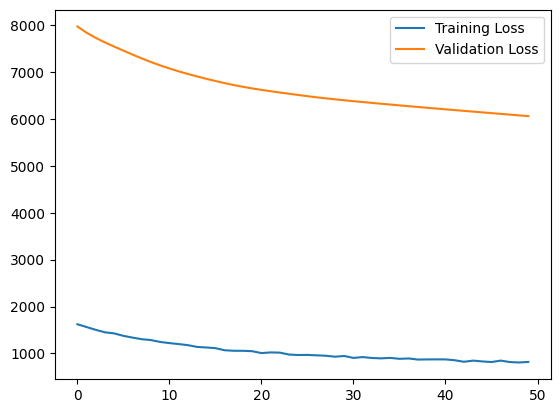

In [9]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


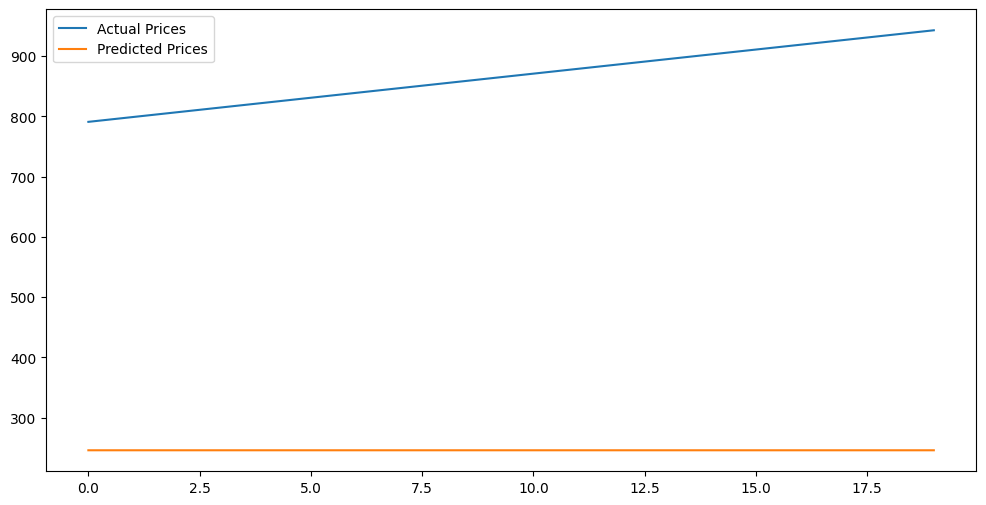

In [10]:
predicted_prices = model.predict(X_test)

# Inverse transform to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label="Actual Prices")
plt.plot(predicted_prices, label="Predicted Prices")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


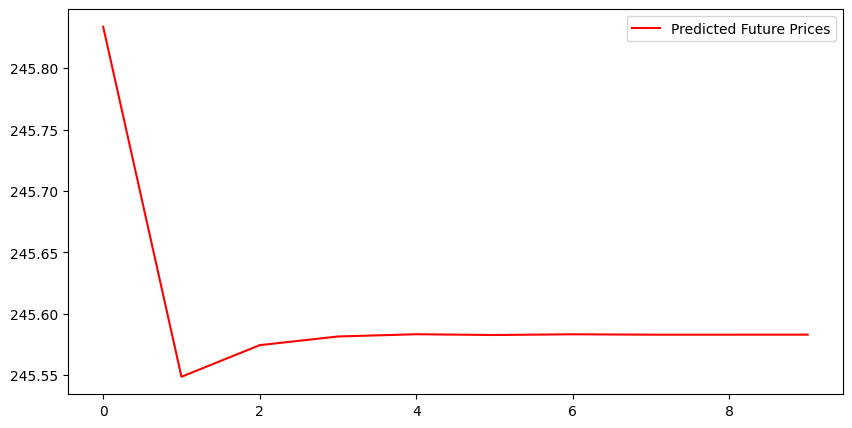

In [11]:
def predict_future(days, model, data, scaler, seq_length=30):
    future_prices = []
    last_sequence = data[-seq_length:]  # Start with the last known sequence

    for _ in range(days):
        pred = model.predict(last_sequence.reshape(1, seq_length, 1))
        future_prices.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred).reshape(seq_length, 1)

    return scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))

# Predict for the next 10 days
future_prices = predict_future(10, model, test_data, scaler)

# Plot future predictions
plt.figure(figsize=(10,5))
plt.plot(future_prices, label="Predicted Future Prices", color='red')
plt.legend()
plt.show()